**Engy-4390** Nuclear Systems Design and Analysis, UMass Lowell, Chem. Eng. Nuclear Program Fall 2024

## Uranium Mill Network Dynamics Simulation

### Stand-Alone Evaporation/Calcination Module

In [15]:
"""Setup a White Mesa plant"""

from cortix import Cortix
from cortix import Network
from cortix import Units as unit
white_mesa = Cortix(use_mpi=False, splash=True)   # system top level - allows system to use cortix functions
wm_net = white_mesa.network = Network()           # calling on the network function
#help(wm_net)


[12336] 2024-10-21 18:01:17,900 - cortix - INFO - Created Cortix object 
_____________________________________________________________________________
                             L A U N C H I N G                               
_____________________________________________________________________________
      ...                                        s       .     (TAAG Fraktur)
   xH88"`~ .x8X                                 :8      @88>
 :8888   .f"8888Hf        u.      .u    .      .88      %8P      uL   ..
:8888>  X8L  ^""`   ...ue888b   .d88B :@8c    :888ooo    .     .@88b  @88R
X8888  X888h        888R Y888r ="8888f8888r -*8888888  .@88u  ""Y888k/"*P
88888  !88888.      888R I888>   4888>"88"    8888    888E`    Y888L
88888   %88888      888R I888>   4888> "      8888      888E      8888
88888 `> `8888>     888R I888>   4888>        8888      888E      `888N
`8888L %  ?888   ! u8888cJ888   .d888L .+    .8888Lu=   888E   .u./"888&
 `8888  `-*""   /   "*888*P"    ^"8888*"     ^%

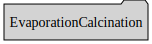

In [8]:
"""Setup Evaporation/Calcination"""
import src.evaporation_calcination
evap_calcin = src.evaporation_calcination.EvaporationCalcination()
wm_net.module(evap_calcin)
wm_net.draw(engine='circo', node_shape='folder', ports=True)

[source code](https://github.com/dpploy/engy-4390/blob/main/projects/2024/u-mill/src/evaporation_calcination.py)

In [9]:
'''Initialize run'''
end_time = 10*unit.day
time_step = 10.0*unit.minute
show_time = (True, unit.hour)

evap_calcin.end_time = end_time
evap_calcin.time_step = time_step
evap_calcin.show_time = show_time

In [10]:
white_mesa.run()
white_mesa.close()

[12336] 2024-10-21 17:49:12,691 - cortix - INFO - Launching Module <src.evaporation_calcination.EvaporationCalcination object at 0x000001FA7FB1C050>
[12336] 2024-10-21 17:49:19,791 - cortix - INFO - run()::Elapsed wall clock time [s]: 490.95
[12336] 2024-10-21 17:49:19,791 - cortix - INFO - Closed Cortix object.
_____________________________________________________________________________
                           T E R M I N A T I N G                             
_____________________________________________________________________________
      ...                                        s       .     (TAAG Fraktur)
   xH88"`~ .x8X                                 :8      @88>
 :8888   .f"8888Hf        u.      .u    .      .88      %8P      uL   ..
:8888>  X8L  ^""`   ...ue888b   .d88B :@8c    :888ooo    .     .@88b  @88R
X8888  X888h        888R Y888r ="8888f8888r -*8888888  .@88u  ""Y888k/"*P
88888  !88888.      888R I888>   4888>"88"    8888    888E`    Y888L
88888   %88888      88

In [11]:
"""Recover modules data"""
evap_calcin = wm_net.modules[0]

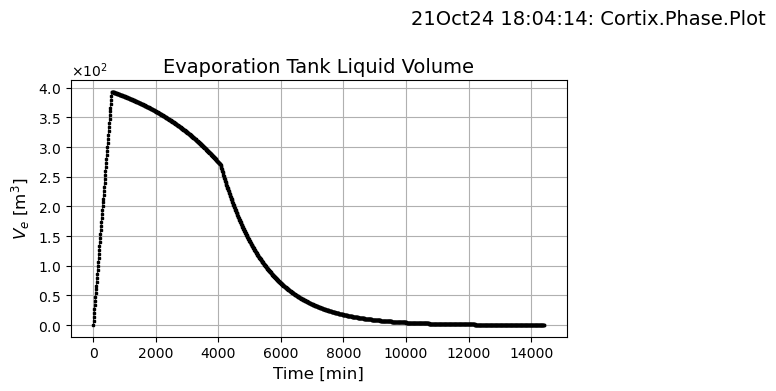

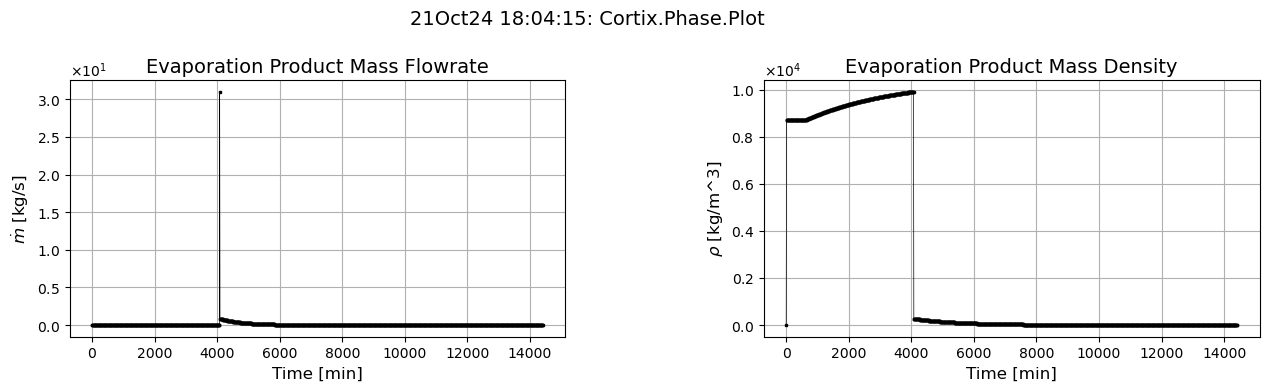

In [18]:
"""Evaporation/Calcination Data"""
evap_calcin.evap_state_phase.plot(['liquid-volume'], show=True,figsize=[14,8])
evap_calcin.evap_product_phase.plot(['mass-flowrate', 'mass-density'], show=True,figsize=[14,8])